In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob

%pylab inline
%matplotlib inline


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
filename = 'cr10_selection.csv'

df = pd.read_csv(filename,delimiter=',', header=7)  
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.sort_index()

dfLS = pd.read_csv('../LSradiation.csv', sep=',', header=0, parse_dates='time')
dfLS['time'] = pd.to_datetime(dfLS['time'])
dfLS = dfLS.set_index('time')
dfLS = dfLS.sort_index()

dfPW = pd.read_csv('BRI2005B.txt', delim_whitespace=True, header=2, parse_dates=[[0, 1, 2, 3]])
dfPW['time'] = pd.to_datetime(dfPW['YYYY_MM_DD_HH'], format='%Y %m %d %H')
dfPW = dfPW.set_index('time')
dfPW = dfPW.sort_index()

IOError: File ../LSradiation.csv does not exist

## Calculate DSi

In [39]:
# sum energy
#energy_scale = linspace(0.0407, 20.7977, 256)    # 0.0814 MeV per channel
energy_scale = linspace(0.2035, 20.8791, 255)    # 0.0814 MeV per channel
uGy_const = 1.602e-7 / 1.398e-4 * (3600/600)     # to uGy/h for 300 s
energy = df.ix[:,8:263].multiply(energy_scale)
#df.ix[:,9:]
df['DSi2'] = energy.ix[:,0:255].sum(axis=1) * uGy_const


In [40]:
df

,flight,lat,lon,alt,DSi,H,E,1,2,3,...,248,249,250,251,252,253,254,255,256,DSi2
date,,,,,,,,,,,,,,,,,,,,,
2005-05-08 00:29:00,JFKPRG,43.1000,-72.4000,33019,1.82000,5.98000,4.68,0,198,121,...,0,0,0,0,0,0,0,0,0,1.824520
2005-05-08 00:39:00,JFKPRG,44.1000,-71.3000,33015,1.63000,4.79000,4.74,0,192,124,...,0,0,0,0,0,0,0,0,0,1.629755
2005-05-08 00:49:00,JFKPRG,45.1000,-70.2000,33015,1.66000,5.27000,4.84,0,231,124,...,0,0,0,0,0,0,0,0,1,1.658578
2005-05-08 00:59:00,JFKPRG,46.1000,-69.0000,33017,1.52000,4.11000,4.88,0,237,138,...,0,0,0,0,0,0,0,0,0,1.518661
2005-05-08 01:09:00,JFKPRG,47.1000,-67.7000,33011,1.49000,4.12000,4.91,0,215,120,...,0,0,0,0,0,0,0,0,0,1.493756
2005-05-08 01:19:00,JFKPRG,48.2000,-66.4000,33021,1.37000,3.56000,4.94,0,225,110,...,0,0,0,0,0,0,0,0,0,1.370069
2005-05-08 01:29:00,JFKPRG,49.3000,-65.0000,33013,1.56000,4.44000,4.96,0,240,123,...,0,0,0,0,0,0,0,0,0,1.555319
2005-05-08 01:39:00,JFKPRG,50.3000,-63.5000,33013,1.50000,3.85000,4.98,0,259,119,...,0,0,0,0,0,0,0,0,0,1.500752
2005-05-08 01:49:00,JFKPRG,51.4000,-62.0000,33015,1.66000,4.96000,4.99,0,226,123,...,0,0,0,0,0,0,0,0,0,1.664734


2005-05-08 00:29:00
2005-09-24 23:51:00


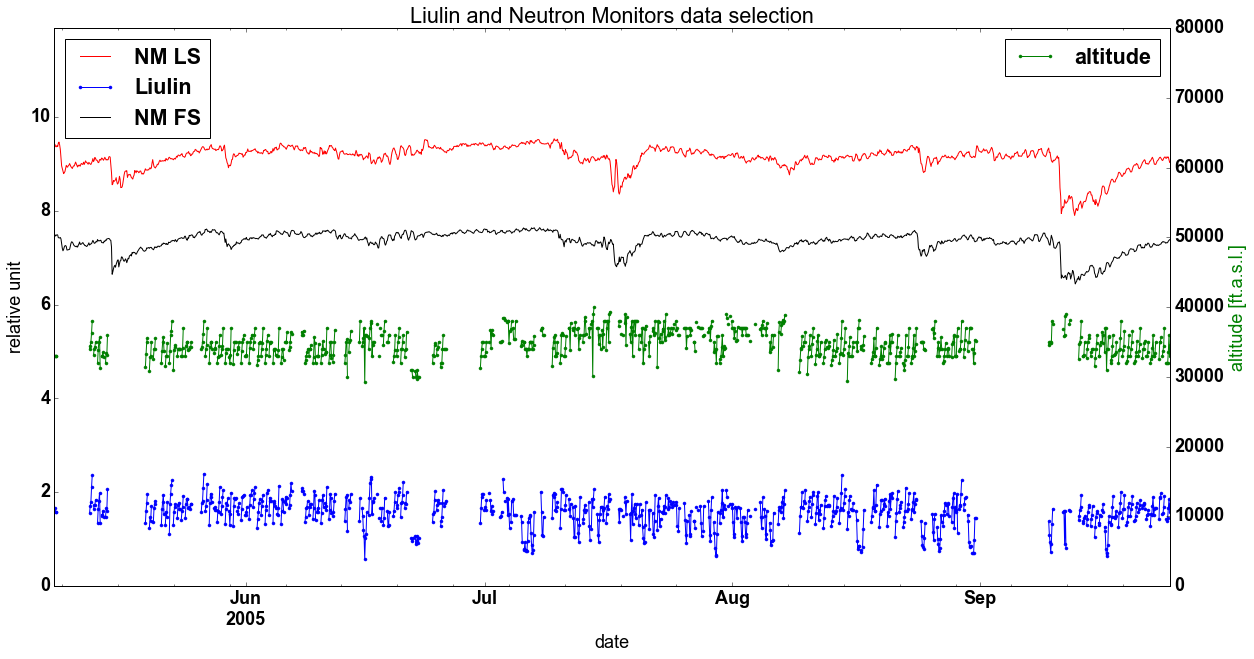

In [69]:
plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

print str(df.index[0])
print str(df.index[len(df)-1])
dff = dfLS[str(df.index[0]):str(df.index[len(df)-1])]
#dff = dff.set_index('date')
dff = dff.sort_index()
dff['LS'] = dff['FD']/10
#dfLS['2005-07-14 01:23': '2005-07-20 00:00']['FD'].plot(figsize=(20, 10))

dfd = df #df.drop(df[df.lon < 0].index)
#dfd = dfd.drop(dfd[dfd.lon > 20].index)
#dfd = dfd.drop(dfd[dfd.lat > 52].index)
#dfd = dfd.drop(dfd[dfd.lat < 47].index)
#dfd = dfd.drop(dfd[dfd.alt < 34000].index)
#dfd = dfd.drop(dfd[dfd.alt > 36000].index)

dff = dff.resample('120MIN', how='mean', base=0, fill_method='pad') 
dfSi = dfd.resample('120MIN', how='mean', base=0) 
dfPW = dfPW.resample('120MIN', how='mean', base=0) 

dfSi['NMLS'] = dff['LS']
dfSi['NMFS'] = dfPW['Corr']/1000
#(dfPW['1']/1000).plot(marker='.', color='brown')
plt.ylim([0,11.9])
plt.ylabel('relative unit')
dff['LS'].plot(color='red', label ='NM LS')
dfSi['DSi'].plot(marker='.', label ='Liulin')#, linestyle='')
dfSi['NMFS'].plot(color='black', label ='NM FS')#, linestyle='')
plt.legend(loc=2)
twinx()
plt.ylim([0,80000])
plt.ylabel('altitude [ft.a.s.l.]', color='green')
dfSi['alt'].plot(marker='.', color='green', label ='altitude')

plt.title('Liulin and Neutron Monitors data selection')  
plt.legend()

## Remove channels

In [47]:
dfSi = dfSi[['lat','lon','alt','DSi','H','E','NMLS','NMFS']]
dfSi.to_csv('Liulin_NM.csv')


In [48]:
dfSi

,lat,lon,alt,DSi,H,E,NMLS,NMFS
date,,,,,,,,
2005-05-08 00:00:00,47.710000,-66.780000,33015.400000,1.587000,4.641000,4.891000,9.36860,7.4295
2005-05-08 02:00:00,56.533333,-46.033333,33016.166667,1.661667,4.855000,5.007500,9.41540,7.4900
2005-05-08 04:00:00,56.341667,-15.466667,33016.166667,1.580833,4.518333,4.837500,9.37010,7.4660
2005-05-08 06:00:00,52.600000,4.425000,33017.500000,1.587500,4.482500,4.392500,9.36700,7.4805
2005-05-08 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.39405,7.4910
2005-05-08 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.37055,7.4865
2005-05-08 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.44110,7.4290
2005-05-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.46740,7.4250
2005-05-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.40735,7.4215


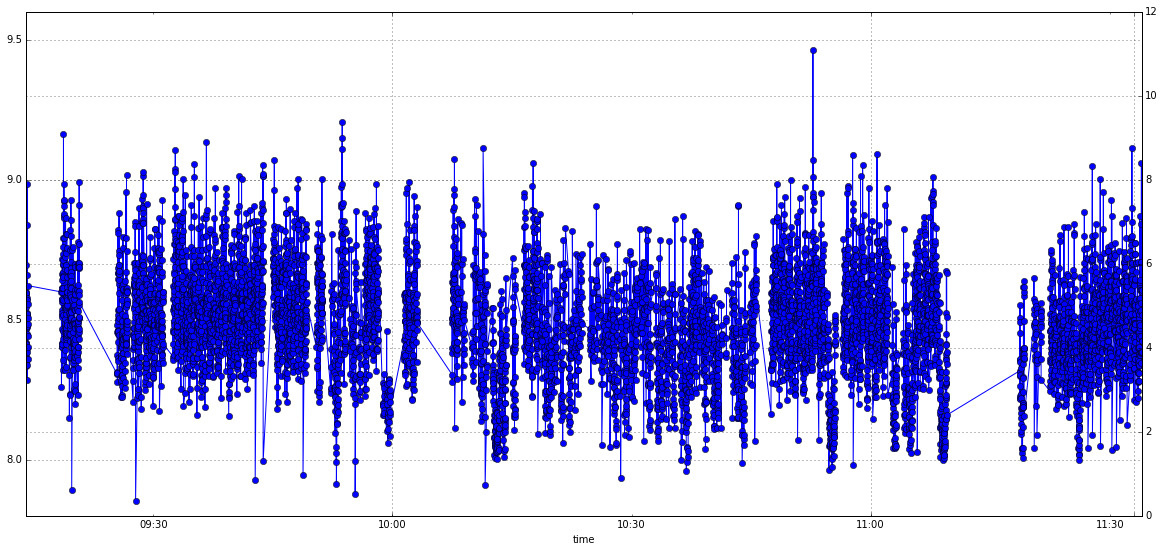

In [5]:
dff['FD'].plot(figsize=(20, 10))

plt.twinx()
#df['alt'].plot(figsize=(20,10), color='red')
df['H'].plot(figsize=(20,10), marker='o')
#df['DSi'].plot(figsize=(20,10), marker='o')

In [52]:
# MAP

import cartopy.crs as ccrs  # maps plotting library
from cartopy.io.img_tiles import GoogleTiles
#from cartopy.io.img_tiles import OSM
from cartopy.io.srtm import srtm_composite

#filename = 'cr10_selection.csv'

#df = pd.read_csv(filename,delimiter=',', header=7, usecols=['date','lat','lon','alt','H'])
#df['date'] = pd.to_datetime(df['date'])
#df = df.set_index('date')

print filename


plt.figure(figsize=(20, 10))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
#ax.set_extent([-10, +140, 0, +90])
ax.set_extent([-160, +160, -90, +90])
#gg_tiles = GoogleTiles()
#gg_tiles = OSM()
#ax.add_image(gg_tiles, 4)
ax.coastlines()
#df = pd.read_csv(filename,sep=',', header=0 )
#df = df[df['0']>10]


#plt.scatter(lon, lat, marker=(5, 1), color='red', s=200)
#plt.title("date: " + date)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False

#ax = plt.axes(projection=ccrs.PlateCarree())
#!!!!podkladova mapa ax.stock_img()

#df = df.resample('1H', how='mean', base=0)
'''
for i in range(len(df)):
    if df['H'][i] > 0:
        if df['alt'][i] > 32000:
            plt.plot(df['lon'][i], df['lat'][i],
                 color=plt.cm.jet(df['H'][i]/10), 
                 marker='.',
                 transform=ccrs.PlateCarree(), #lw=3
                 )
'''

#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=10))
#sm._A = []
#cb = plt.colorbar(sm, shrink=0.7)
#cb.set_label('H*(10)[uSy/h]')
#plt.show()




cr10_selection.csv


"\nfor i in range(len(df)):\n    if df['H'][i] > 0:\n        if df['alt'][i] > 32000:\n            plt.plot(df['lon'][i], df['lat'][i],\n                 color=plt.cm.jet(df['H'][i]/10), \n                 marker='.',\n                 transform=ccrs.PlateCarree(), #lw=3\n                 )\n"

TypeError: unhashable type: 'MultiLineString'